In [1]:
import pandas as pd
import pickle

#loding the dataset
df = pd.read_csv('ipl.csv')

In [2]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
# -Removing the unwanted columns
columns_to_remove =['mid','venue','batsman','bowler','striker','non-striker']
df.drop(labels=columns_to_remove , axis=1,inplace=True)

In [4]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [5]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [6]:
#keeping only consistent teams
consistent_team = ['Kolkata Knight Riders','Chennai Super Kings','Rajasthan Royals',
                   'Mumbai Indians','Kings XI Punjab','Sunrisers Hyderabad'
                   ,'Royal Challengers Bangalore']

In [7]:
df = df[(df['bat_team'].isin(consistent_team)) &(df['bowl_team'].isin(consistent_team))]

In [8]:
#Removing the first 5 Overs data in every match
df = df[df['overs']>=5.0]

In [9]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Mumbai Indians'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Rajasthan Royals'
 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Rajasthan Royals'
 'Mumbai Indians' 'Chennai Super Kings' 'Kolkata Knight Riders'
 'Sunrisers Hyderabad']


In [10]:
#converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [11]:
#Converting categorical features using oneHotEncoding method
encoded_df = pd.get_dummies(data =df,columns=['bat_team','bowl_team'])

In [12]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [13]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [14]:
#Rearranging the columns
encoded_df = encoded_df[['date','bat_team_Chennai Super Kings', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','runs', 
      'wickets', 'overs', 'runs_last_5', 'wickets_last_5','total']]

In [15]:
X_train = encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year<=2016]
X_test = encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year>= 2017]

In [16]:
y_train = encoded_df[encoded_df['date'].dt.year <=2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >=2017]['total'].values

In [17]:
X_train.drop(labels='date',axis= True,inplace= True)
X_test.drop(labels='date',axis= True, inplace= True)

In [18]:
# Model Building 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

# Ridge Regression

In [19]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [22]:
ridge =Ridge()
parameters ={'alpha':[1e-15,1e-10,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

c:\python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.44464e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.05648e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.16755e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.99653e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.04627e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\python38\lib\site

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 0.001, 0.01, 1, 5, 10, 20, 30,
                                   35, 40]},
             scoring='neg_mean_squared_error')

In [23]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-338.4214411417058


In [24]:
prediction =ridge_regressor.predict(X_test)

<AxesSubplot:>

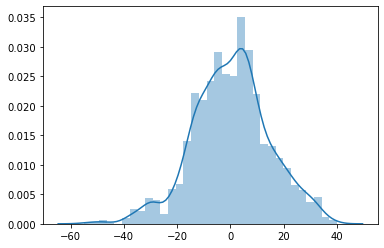

In [26]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [27]:
from sklearn import metrics
import numpy as np
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 11.268926113943017
MSE 206.86325732539404
RMSE 14.38274164842691


In [28]:
# Creating a pickle file for the classifier
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(ridge_regressor, open(filename, 'wb'))